### importare le librerie utili per la creazione del codice 

# Creazione del file PyCalcolAr (file excel CalcolAr automatizzato in codice Python)

In [115]:
import pandas as pd
import numpy as np
import math 

from IPython.display import display

### importare il file triplo36 (file di calibrazione dell'aria)
                                 
   per importare il file definire il percorso (file_path, dove trovare il file sul computer)                              

In [116]:
delay = 246

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0', 'Run', 'Path']

# trasformare le colonne in dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0']

# definire il percorso del file
file_path = "../test_data/Triplo36.txt"

# importare il file
# utilizzare due caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python') 

In [117]:
# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
airpipette_data   


,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Run,Path
0,0.73900,0.00400,49900.0,58.0,72000.0,230.0,259000.0,160.0,144000.0,1300.0,'Sample Name' run on 06 October 2015 at 10:33,Raw data stored in - C:\Nu Noble\Results\Data...
1,1.22000,0.00041,49700.0,60.0,75600.0,200.0,258000.0,160.0,251000.0,870.0,'Sample Name' run on 06 October 2015 at 10:52,Raw data stored in - C:\Nu Noble\Results\Data...
2,1.22000,0.00051,49800.0,51.0,76800.0,190.0,259000.0,150.0,251000.0,910.0,'Sample Name' run on 06 October 2015 at 11:23,Raw data stored in - C:\Nu Noble\Results\Data...
3,0.75800,0.00400,49700.0,55.0,66600.0,230.0,258000.0,140.0,144000.0,1100.0,'Sample Name' run on 08 October 2015 at 10:13,Raw data stored in - C:\Nu Noble\Results\Data...
4,1.09000,0.00036,43300.0,63.0,60800.0,170.0,224000.0,130.0,220000.0,1400.0,'Sample Name' run on 08 October 2015 at 10:27,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...
829,1.65538,0.00053,55318.2,79.0,307546.0,250.0,298052.0,240.0,347513.0,1100.0,'Sample Name' run on 23 June 2020 at 11:02,Raw data stored in - C:\Nu Noble\Results\Data...
830,1.65331,0.00043,55167.7,90.0,305585.0,220.0,297394.0,300.0,349141.0,1300.0,'Sample Name' run on 24 June 2020 at 09:25,Raw data stored in - C:\Nu Noble\Results\Data...
831,1.65039,0.00049,55606.8,82.0,306701.0,200.0,299474.0,260.0,347983.0,1300.0,'Sample Name' run on 24 June 2020 at 09:50,Raw data stored in - C:\Nu Noble\Results\Data...
832,1.64847,0.00056,55592.8,63.0,306848.0,260.0,299066.0,230.0,346598.0,1400.0,'Sample Name' run on 24 June 2020 at 10:08,Raw data stored in - C:\Nu Noble\Results\Data...


### il dataframe deve essere filtrato per data, per poter scegliere la riga di calibrazione d'interesse

In [118]:
# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)
display(airpipette_data)

,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
0,Sample Name,2015-10-06 10:33:00,0.73900,0.00400,49900.0,58.0,72000.0,230.0,259000.0,160.0,144000.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2015-10-06 10:52:00,1.22000,0.00041,49700.0,60.0,75600.0,200.0,258000.0,160.0,251000.0,870.0,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-10-06 11:23:00,1.22000,0.00051,49800.0,51.0,76800.0,190.0,259000.0,150.0,251000.0,910.0,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-10-08 10:13:00,0.75800,0.00400,49700.0,55.0,66600.0,230.0,258000.0,140.0,144000.0,1100.0,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-10-08 10:27:00,1.09000,0.00036,43300.0,63.0,60800.0,170.0,224000.0,130.0,220000.0,1400.0,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Sample Name,2020-06-23 11:02:00,1.65538,0.00053,55318.2,79.0,307546.0,250.0,298052.0,240.0,347513.0,1100.0,Raw data stored in - C:\Nu Noble\Results\Data...
830,Sample Name,2020-06-24 09:25:00,1.65331,0.00043,55167.7,90.0,305585.0,220.0,297394.0,300.0,349141.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
831,Sample Name,2020-06-24 09:50:00,1.65039,0.00049,55606.8,82.0,306701.0,200.0,299474.0,260.0,347983.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
832,Sample Name,2020-06-24 10:08:00,1.64847,0.00056,55592.8,63.0,306848.0,260.0,299066.0,230.0,346598.0,1400.0,Raw data stored in - C:\Nu Noble\Results\Data...


In [114]:
airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000;
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000;
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000;

### qui scelgo la data 

In [96]:
# filtrare il dataframe per data, prendendo una sola riga 
import ipywidgets as widgets

# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
                 value=airpipette_data['Date_Time'].to_list()[-1],
                 description='Date_Time of calibration:',
                 disabled=False)
display(data_w)

Dropdown(description='Date_Time of calibration:', index=833, options=(Timestamp('2015-10-06 10:33:00'), Timest…

### Utente: selezionare la data d'interesse nell'elenco qui sopra, prima di eseguire (runnare) la cella successiva  

In [97]:
print(data_w.value)
airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w.value]

calibration_data = airpipette_data_filtered 
display(calibration_data)


2020-06-29 09:41:00


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
833,Sample Name,2020-06-29 09:41:00,1.65661,0.00047,3.394502e+12,85.0,305470.0,280.0,293720.0,330.0,346964.0,1200.0,Raw data stored in - C:\Nu Noble\Results\Data...


### importare i file Run4 e Run22 
(con i medesimi passaggi svolti per triplo36)

In [16]:
# definire la lista con gli indici delle colonne 
column_names_run4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']
column_names_run22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']

# definire il percorso dei file
file_path_4 = "../test_data/Run4.txt"
file_path_22 = "../test_data/Run22.txt"

# importare i file run
df_data_4 = pd.read_csv(file_path_4, header = None, index_col= False, names = column_names_run4, sep = '\t|,', engine = 'python')
df_data_22 = pd.read_csv(file_path_22, header = None, index_col= False, names = column_names_run22, sep = '\t|,', engine = 'python')

In [17]:
# eliminare i caratteri "{}" dalle colonne
df_data_4 = df_data_4.replace(["{", "}"], ["", ""], regex=True)
df_data_22 = df_data_22.replace(["{", "}"], ["", ""], regex=True)

In [18]:
# definire nome delle colonne che contengono dati numerici
colnames_numeric_4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']   
colnames_numeric_22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_4:
    df_data_4[i] = pd.to_numeric(df_data_4[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_22:
    df_data_22[i] = pd.to_numeric(df_data_22[i])

### Dopo aver importato i due file come dataframe, verranno uniti a formare un unico dataframe 

In [19]:
df_data = pd.concat([df_data_4, df_data_22], axis=0)
display(df_data)

,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,...,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Run,Path
0,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,0.002610,1.300000e-06,...,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,'fishcanyon bt stp1' run on 08 April 2015 at 1...,Raw data stored in - C:\Nu Noble\Results\Data...
1,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,0.006510,2.500000e-06,...,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,'fishcanyon bt stp2' run on 08 April 2015 at 1...,Raw data stored in - C:\Nu Noble\Results\Data...
2,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,0.003050,1.400000e-06,...,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,'Sample Name' run on 08 April 2015 at 17:28,Raw data stored in - C:\Nu Noble\Results\Data...
3,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,0.000259,2.900000e-07,...,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,'Sample Name' run on 09 April 2015 at 11:39,Raw data stored in - C:\Nu Noble\Results\Data...
4,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,0.001700,8.900000e-07,...,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,'Sample Name' run on 09 April 2015 at 12:11,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,0.000881,8.000000e-07,...,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,'BAL-T12 LG ST2' run on 23 June 2020 at 15:31,Raw data stored in - C:\Nu Noble\Results\Data...
1334,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,0.000268,4.100000e-07,...,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,'BAL-T12 LG ST3' run on 23 June 2020 at 15:57,Raw data stored in - C:\Nu Noble\Results\Data...
1335,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,0.000749,6.800000e-07,...,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,'BAL-T12 LG ST6' run on 23 June 2020 at 17:08,Raw data stored in - C:\Nu Noble\Results\Data...
1336,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,0.000581,6.800000e-07,...,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,'BAL-T12 ST7' run on 23 June 2020 at 17:26,Raw data stored in - C:\Nu Noble\Results\Data...


### il dataframe deve essere filtrato per data 
(come fatto per triplo36)

In [20]:
# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)
display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,fishcanyon bt stp1,2015-04-08 16:03:00,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,...,6.600000e-09,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,Raw data stored in - C:\Nu Noble\Results\Data...
1,fishcanyon bt stp2,2015-04-08 16:33:00,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,...,1.000000e-08,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-04-08 17:28:00,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,...,8.200000e-09,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-04-09 11:39:00,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,...,4.400000e-08,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-04-09 12:11:00,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,...,6.400000e-09,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,BAL-T12 LG ST2,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,...,NaN,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
1334,BAL-T12 LG ST3,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,...,NaN,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
1335,BAL-T12 LG ST6,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,...,NaN,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
1336,BAL-T12 ST7,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,...,NaN,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare set di dati per data

In [21]:
type(df_data['Date_Time'])
# filtrare il dataframe per data 
filter_data_min = pd.Timestamp(year=2020, month=6, day=24, hour=8)
filter_data_max = pd.Timestamp(year=2020, month=6, day=24, hour=20)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & \
                                           (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,TOM SM ST1,2020-06-24 11:19:00,0.143381,0.000050,0.000129,2.500000e-07,0.000410,4.800000e-07,0.000205,0.000018,...,5.600000e-08,1.45045,0.1300,0.960810,0.00160,349.708,0.43,363.972,0.45,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2020-06-24 11:47:00,0.646386,0.000210,0.000391,4.200000e-07,0.001882,1.300000e-06,0.000501,0.000016,...,6.800000e-08,1.28278,0.0660,0.970343,0.00088,343.386,0.26,353.881,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
2,TOM SM ST3,2020-06-24 12:08:00,0.113456,0.000036,0.000180,2.900000e-07,0.000300,4.200000e-07,0.000225,0.000017,...,6.100000e-08,1.21714,0.0230,0.971918,0.00180,378.730,0.55,389.672,0.50,Raw data stored in - C:\Nu Noble\Results\Data...
3,TOM SM ST4,2020-06-24 12:29:00,0.140526,0.000047,0.000288,4.000000e-07,0.000351,4.000000e-07,0.000363,0.000017,...,6.500000e-08,1.21116,0.0120,0.982168,0.00170,400.302,0.47,407.569,0.53,Raw data stored in - C:\Nu Noble\Results\Data...
4,TOM SM ST5,2020-06-24 12:57:00,0.341902,0.000110,0.000471,4.300000e-07,0.000922,7.800000e-07,0.000567,0.000017,...,5.600000e-08,1.18115,0.0089,0.979210,0.00110,370.815,0.33,378.688,0.31,Raw data stored in - C:\Nu Noble\Results\Data...


### Operazioni derivate dal file di calibrazione

per calcolare 1sig_rel (errore relativo) = err / 36Ar (IC0 o IC1 in base al collettore usato)

In [22]:
# per calcolare 1sig_rel (errore relativo) = err / 36Ar (IC0 o IC1 in base al collettore usato)

value_err36IC0 = float(calibration_data['err 36IC0'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)
print ('1sig_rel_36IC0', sig_rel_36IC0)

1sig_rel_36IC0 0.00112351899768487


In [23]:
value_err36IC1 = float(calibration_data['err 36IC1'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)
print ('1sig_rel_36IC1', sig_rel_36IC1)

1sig_rel_36IC1 0.000916620290044849


In [24]:
value_err36F = float(calibration_data['err 36F'].values)
value_36F = float(calibration_data['36F'].values)
sig_rel_36F = float(value_err36F / value_36F)
print ('1sig_rel_36F', sig_rel_36F)

1sig_rel_36F 0.0034585720708776705


In [25]:
# calcolo gain F/IC0
value_36F = float(calibration_data['36F'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
gain_F_IC0 = float(value_36F / value_36IC0)
print ('gain F/IC0', gain_F_IC0)

gain F/IC0 1.1812746833719188


In [26]:
# calcolo l'errore assoluto del gain F/IC0
sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)
print ('sig_abs_F/ICO', sig_abs_F_ICO)

sig_abs_F/ICO 0.0042956864573216935


In [27]:
# calcolo gain F/IC1 
value_36F = float(calibration_data['36F'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
gain_F_IC1 = float(value_36F / value_36IC1)
print ('gain F/IC1: ', gain_F_IC1)

gain F/IC1:  1.1358365796968606


In [28]:
# calcolo l'errore assoluto del gain F/IC1
sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)
print ('sig_abs_F/IC1', sig_abs_F_IC1)

sig_abs_F/IC1 0.004063996223501063


In [29]:
# calcolo 36IC0 correzione gain
corr_gain_36IC0 = value_36IC0 * gain_F_IC0
print ('corr_gain_36IC0: ', corr_gain_36IC0) 

corr_gain_36IC0:  346964.0


In [30]:
# calcolo 40/36 correzione
value_40F = float(calibration_data['40F'].values)
B = 62415000 #aggiungere descrizione della constante
corr_40_36 = (value_40F * B) / corr_gain_36IC0
print ('corr_40_36: ', corr_40_36)

corr_40_36:  298.0058828869854


In [31]:
# calcolo l'errore assoluto del 40/36 correzione
sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / calibration_data['40F'].values, 2))**(1/2)
print ('sig_abs_40/36', sig_abs_40_36)

sig_abs_40/36 [1.0341368]


In [32]:
# calcolo source frax 
source_frax = float(corr_40_36 / 298.56)
print ('source_frax: ', source_frax)

source_frax:  0.9981440343213605


In [33]:
# calcolo l'errore assoluto di source frax
sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)
print ('sig_abs_source_frax', sig_abs_source_frax)

sig_abs_source_frax [0.00346375]


Definisco tutti i parametri delle tabelle (A) e (B) del file excel (non sappiamo ancora da dove vengono presi tutti)

In [34]:
# da modificare a mano 

update_data = pd.Timestamp(year=2021, month=1, day=23)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.0040, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2021-01-23 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.004,0.2
Background 36Ar,0.0005,0.1


In [35]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, np.nan],
                                '(36Ar/37Ar) Ca': [0.000255, 0.015],
                                '(38Ar/37Ar) Ca': [0.00027, 0.015],
                                '(39Ar/37Ar) Ca': [0.00067, 0.015],
                                'Lambda Ar37 [1/d]': [0.019748, np.nan],
                                'Lambda Ar40 [1/Ma]': [0.0005543, np.nan],
                                'Interference 40K': [0.033, 0.01],
                                'Coefficient 39Ar for J': [143, np.nan],
                                'Coefficient Ca/K': [1.94, np.nan],
                                'Coefficient Cl/K': [0.178, np.nan]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)


,value,relative error
Atmospheric Ratio,298.560000,NaN
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,NaN
Lambda Ar40 [1/Ma],0.000554,NaN
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,NaN
Coefficient Ca/K,1.940000,NaN
Coefficient Cl/K,0.178000,NaN


In [36]:
sample_weight = 0.00034
J_factor = 0.0011422
J_factor_errors = 0.0005
sensitivity = 0.0000000000337 
gain_F_IC0 = gain_F_IC0 # già calcolato precedentemente 
gain_rel_uncertainty_errors = calibration_data['err 40F'].values / calibration_data['err 36F'].values
gain_rel_uncertainty = gain_rel_uncertainty_errors / gain_F_IC0
measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values
gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio', 'value']
pipette_rel_uncertainty = sig_abs_source_frax  
total_fractionation_uncertainty = sig_abs_source_frax 

irradiations_dict = {'Sample weight [g]': [sample_weight, np.nan],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, np.nan],
                     'Gain F/IC0': [gain_F_IC0, np.nan],
                     'Gain rel uncertainty': [gain_rel_uncertainty[0], gain_rel_uncertainty_errors[0]],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], np.nan],
                     'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]], 
                     'Pipette rel uncertainty': [pipette_rel_uncertainty[0], np.nan],
                     'Total fractionation uncertainty': [total_fractionation_uncertainty[0], np.nan]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],3.400000e-04,NaN
J factor,1.142200e-03,5.000000e-04
Sensitivity (mL/mV),3.370000e-11,NaN
Gain F/IC0,1.181275e+00,NaN
Gain rel uncertainty,3.315627e-07,3.916667e-07
Measured 40Ar/36Ar pipettes,5.423151e-06,NaN
Gain corrected 40Ar/36Ar pipettes,4.590932e-06,1.537691e-08
Pipette rel uncertainty,3.463749e-03,NaN
Total fractionation uncertainty,3.463749e-03,NaN


###### Svolgimento operazioni presenti nel fogli excel CalcolAr

Le operazione necessarie verranno aggiunte in un unico dataframe di risultati simile a quello del file excel 


In [37]:
input_data_df = pd.DataFrame()

input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))


input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '39Ar'] = df_data.loc[:, '39Ar F'].values * 1000
input_data_df.loc[:, 'err39Ar'] = df_data.loc[:, 'err39Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar F'].values * 1000

input_data_df.loc[:, '37Ar'] = df_data.loc[:, '37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err37Ar'] = df_data.loc[:, 'err37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

display(input_data_df)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815


In [38]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - (results_data.loc[:, '39Ar'].values * \
                                      irradiations_constants_df.loc['Interference 40K', 'value']) - background_spectrometer_df.loc['Background 40Ar', 'value']

results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                                                                            background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                                                                            background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                                                                            background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                                                                            background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                                                                            background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values


display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.093741,0.127707,0.018,0.140950,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.053371,0.389718,0.016,0.041056,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.019581,0.178522,0.017,0.095228,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.010019,0.287412,0.017,0.059150,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.007555,0.469661,0.017,0.036197,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766


In [39]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
 #                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
 #                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                        results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.127707,0.018,0.140950,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197,130.043076
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.389718,0.016,0.041056,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603,130.043076
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.178522,0.017,0.095228,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246,130.043076
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.287412,0.017,0.059150,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254,130.043076
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.469661,0.017,0.036197,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766,130.043076


In [40]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197,130.043076,1.537691e-08,0.5,0.75
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603,130.043076,1.537691e-08,0.5,0.75
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246,130.043076,1.537691e-08,0.5,0.75
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254,130.043076,1.537691e-08,0.5,0.75
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766,130.043076,1.537691e-08,0.5,0.75


In [41]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)
                                                                        
display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,130.043076,1.537691e-08,0.5,0.75,8.778419e-09,0.003665,0.063854,0.140960,0.144034,0.093745
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,130.043076,1.537691e-08,0.5,0.75,3.602157e-08,0.003516,0.194859,0.041093,0.224882,0.053378
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,130.043076,1.537691e-08,0.5,0.75,5.441583e-09,0.003681,0.089261,0.095244,0.689528,0.019600
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,130.043076,1.537691e-08,0.5,0.75,6.413647e-09,0.003684,0.143706,0.059175,1.272728,0.010057
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,130.043076,1.537691e-08,0.5,0.75,1.639044e-08,0.003547,0.234831,0.036238,1.687973,0.007604


In [42]:
 

results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                 (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])
results_data.loc[:,'1sigRel37corr'] = (((pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                         pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2)) * 9) / 16)**(1/2)
                                        
display(results_data)
                                                           

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.5,0.75,8.778419e-09,0.003665,0.063854,0.140960,0.144034,0.093745,4.402596e-09,0.137116
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.5,0.75,3.602157e-08,0.003516,0.194859,0.041093,0.224882,0.053378,4.814192e-09,0.125465
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.5,0.75,5.441583e-09,0.003681,0.089261,0.095244,0.689528,0.019600,3.136400e-09,0.191908
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.5,0.75,6.413647e-09,0.003684,0.143706,0.059175,1.272728,0.010057,3.463199e-09,0.173840
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.5,0.75,1.639044e-08,0.003547,0.234831,0.036238,1.687973,0.007604,3.429573e-09,0.175792


In [43]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                      
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values  

results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)                                                                     
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values
                                                                        
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)  
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values
                                        
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value'] 
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

                                     
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'error magnif'] = 1 - (results_data.loc[:,'rendimento rad'].values - 1)
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

                                     
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*'] 
results_data.loc[:,'Ar38Cl'] = (results_data.loc[:,'Ar38tot'].values - results_data.loc[:,'Ar39K'].values) / 90 - (results_data.loc[:,'Ar36Atm'].values * 0.18855) - (results_data.loc[:,'Ar37day0'].values * 0.00027)
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                      pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                       pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                        pow((results_data.loc[:,'1sigRel37corr'].values * results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values


display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,9.605282e-09,143.372561,0.050000,1.0,1.0,0.003665,0.000349,-0.000891,0.140961,-158.223817
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,3.781104e-08,646.373995,0.210000,1.0,1.0,0.003516,0.000325,-0.000334,0.041093,-123.183760
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,5.980665e-09,113.423560,0.036001,1.0,1.0,0.003682,0.000317,-0.006670,0.095244,-14.280220
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,7.054268e-09,140.467899,0.047000,1.0,1.0,0.003684,0.000335,-0.012545,0.059175,-4.717146
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.735958e-08,341.825625,0.110000,1.0,1.0,0.003548,0.000322,-0.016146,0.036239,-2.244433


In [44]:
#colonne RESULTS

results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

results_data.loc[:,'39Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)
total_mL_39Ar = results_data.loc[:,'39Ar'].sum()

results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39Ar'].values / total_mL_39Ar)                                                         

results_data.loc[:,'38Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values                                                                                           
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38Ar'].values * results_data.loc[:,'1sigRel38tot'].values

results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values
                                 
results_data.loc[:,'37Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37Ar'].values

results_data.loc[:,'36Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36Ar'].values

results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:, '40Ar*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values) / \
                                        irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value'])


results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                        (pow(irradiations_df.loc['J factor', 'relative error'], 2) * \
                                         pow(results_data.loc[:,'1sigRel40*'].values, 2) * \
                                         pow(results_data.loc[:,'1sigAbs39K'].values / \
                                             results_data.loc[:,'Ar39K'].values, 2))**(1/2)

results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values    

results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / results_data.loc[:,'Ar39K'].values, 2))**(1/2)

results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * (results_data.loc[:,'38Ar_Cl'].values * results_data.loc[:,'39Ar'].values)
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - (results_data.loc[:,'Ar37day0'].values * \
                                irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                                                    pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09,-2.593999e-26,-4.104325e-24,0.001005,0.000094,6.122020e-11,2.254080e-13
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09,-1.516515e-26,-1.868100e-24,0.000348,0.000019,5.572678e-11,1.967657e-13
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09,-9.296813e-25,-1.327607e-23,0.006079,0.000119,4.796872e-11,1.772648e-13
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10,-3.227565e-24,-1.522493e-23,0.009061,0.000091,4.565288e-11,1.688989e-13
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10,-5.509482e-24,-1.236573e-23,0.004938,0.000038,4.794714e-11,1.707979e-13


For Spectrum

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cl/K')

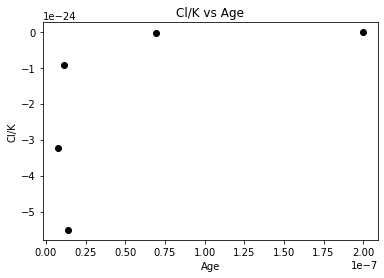

In [46]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

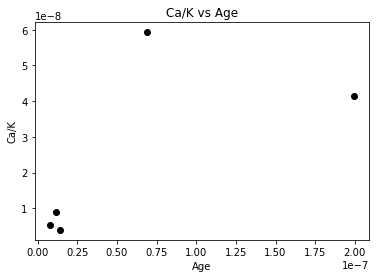

In [47]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

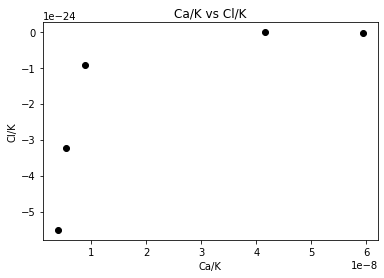

In [48]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

In [49]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

Text(0, 0.5, '36Ar/39Ar')

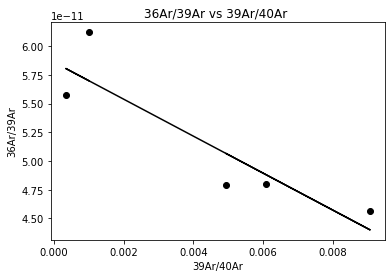

In [50]:
plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [51]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 0.03630977337987146
y_intercept = 5.862317446742615e-11
slope = -1.614528789648802e-09


Crea Spectrum Age plot 

In [52]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()

In [53]:
cumulative_df = pd.DataFrame(cumulative)
cumulative_df

,% 39Ar
0,3.583693
1,9.178952
2,26.335051
3,58.001686
4,100.000000


In [54]:
# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])
age_più_2error_df

,Age+2error
0,6.912401e-08
1,1.995985e-07
2,1.142295e-08
3,7.664235e-09
4,1.406263e-08


In [55]:
# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])
age_meno_2error_df

,Age-2error
0,6.912401e-08
1,1.995985e-07
2,1.142295e-08
3,7.664235e-09
4,1.406263e-08


In [56]:
# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns
double_cumulative_df

,% 39Ar
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000
9,100.000000


In [57]:
# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})
double_cumulative_df

,Cum%39
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000
9,100.000000


In [58]:
# Cancella l'ultima riga di (Cum%39)
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=9))
double_cumulative_df

,Cum%39
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000


In [59]:
# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index
double_cumulative_df


,Cum%39
0,0.000000
1,3.583693
2,3.583693
3,9.178952
4,9.178952
5,26.335051
6,26.335051
7,58.001686
8,58.001686
9,100.000000


In [60]:
# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns
double_age_più_2error_df

,Age+2error
0,6.912401e-08
1,6.912401e-08
2,1.995985e-07
3,1.995985e-07
4,1.142295e-08
5,1.142295e-08
6,7.664235e-09
7,7.664235e-09
8,1.406263e-08
9,1.406263e-08


In [61]:
# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns
double_age_meno_2error_df

,Age-2error
0,6.912401e-08
1,6.912401e-08
2,1.995985e-07
3,1.995985e-07
4,1.142295e-08
5,1.142295e-08
6,7.664235e-09
7,7.664235e-09
8,1.406263e-08
9,1.406263e-08


In [62]:
# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

,Cum%39,Age+2error,Age-2error
0,0.000000,6.912401e-08,6.912401e-08
1,3.583693,6.912401e-08,6.912401e-08
2,3.583693,1.995985e-07,1.995985e-07
3,9.178952,1.995985e-07,1.995985e-07
4,9.178952,1.142295e-08,1.142295e-08
5,26.335051,1.142295e-08,1.142295e-08
6,26.335051,7.664235e-09,7.664235e-09
7,58.001686,7.664235e-09,7.664235e-09
8,58.001686,1.406263e-08,1.406263e-08
9,100.000000,1.406263e-08,1.406263e-08


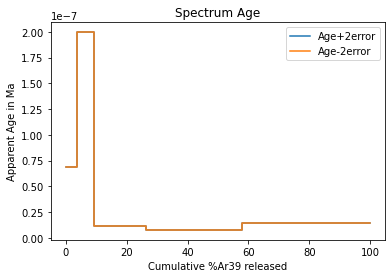

In [63]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error')
plt.title('Spectrum Age')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age in Ma')
plt.legend()